<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Atacantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[01/04/25 17:26:52] INFO     No custom team name replacements found. You can configure these in       ]8;id=971495;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=823094;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=796737;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=516313;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[01/04/25 17:26:54] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=558308;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=745465;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK) e Zagueiros (DF)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgR'),
#    ('Expected', 'xG'),
#    ('Expected', 'xAG'),
#    ('Performance', 'G-PK'),
#    ('Performance', 'Ast'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')

In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                   Playing Time               \
                                                             MP Starts   Min   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio           20     14  1215   
                                  Alex Santana                4      0   101   
                                  Bento                       7      7   630   
                                  Bruno Praxedes              7      2   237   
                                  Bruno Zapelli              32     16  1412   

                                                         Performance      ...  \
                                                     90s         Gls Ast  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           4   1  ...   
                                  Alex Santana       1.1           0   0  ...   
                                  Bento              7.0           0   0  ...   
                                  Bruno Praxedes     2.6           0   0  ...   
                                  Bruno Zapelli     15.7           0   5  ...   

                                                   Per 90 Minutes              \
                                                              Gls   Ast   G+A   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            0.3  0.07  0.37   
                                  Alex Santana                0.0   0.0   0.0   
                                  Bento                       0.0   0.0   0.0   
                                  Bruno Praxedes              0.0   0.0   0.0   
                                  Bruno Zapelli               0.0  0.32  0.32   

                                                                            \
                                                   G-PK G+A-PK    xG   xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.3   0.37  0.26  0.18   
                                  Alex Santana      0.0    0.0  0.06   0.0   
                                  Bento             0.0    0.0   0.0   0.0   
                                  Bruno Praxedes    0.0    0.0  0.03  0.12   
                                  Bruno Zapelli     0.0   0.32  0.24   0.3   

                                                                          
                                                   xG+xAG  npxG npxG+xAG  
league      season team           player                                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   0.44  0.26     0.44  
                                  Alex Santana       0.06  0.06     0.06  
                                  Bento               0.0   0.0      0.0  
                                  Bruno Praxedes     0.15  0.03     0.15  
                                  Bruno Zapelli      0.54  0.24     0.54  

[5 rows x 33 columns]

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born Playing Time         ... Per 90 Minutes                                \
                  MP Starts  ...            Gls   Ast   G+A G-PK G+A-PK    xG   
0  1998           20     14  ...            0.3  0.07  0.37  0.3   0.37  0.26   
1  1995            4      0  ...            0.0   0.0   0.0  0.0    0.0  0.06   
2  1999            7      7  ...            0.0   0.0   0.0  0.0    0.0   0.0   
3  2002            7      2  ...            0.0   0.0   0.0  0.0    0.0  0.03   
4  2002           32     16  ...            0.0  0.32  0.32  0.0   0.32  0.24   

                               
    xAG xG+xAG  npxG npxG+xAG  
0  0.18   0.44  0.26     0.44  
1   0.0   0.06  0.06     0.06  
2   0.0    0.0   0.0      0.0  
3  0.12   0.15  0.03     0.15  
4   0.3   0.54  0.24     0.54  

[5 rows x 37 columns]

In [8]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Performance       \
                                                                CrdY CrdR   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           6    1   
                                  Alex Santana       1.1           2    0   
                                  Bento              7.0           1    0   
                                  Bruno Praxedes     2.6           0    0   
                                  Bruno Zapelli     15.7           3    0   

                                                                  ...          \
                                                   2CrdY Fls Fld  ... Crs Int   
league      season team           player                          ...           
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     1  17  25  ...  36   4   
                                  Alex Santana         0   3   1  ...   0   0   
                                  Bento                0   1   0  ...   0   0   
                                  Bruno Praxedes       0   8   2  ...   7   2   
                                  Bruno Zapelli        0  19  18  ...  93   8   

                                                                              \
                                                   TklW PKwon PKcon OG Recov   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   19     0     0  0    71   
                                  Alex Santana        0     0     0  0     6   
                                  Bento               0     0     1  0     4   
                                  Bruno Praxedes      4     0     0  0    13   
                                  Bruno Zapelli      19     0     0  0    70   

                                                   Aerial Duels              
                                                            Won Lost   Won%  
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            7    7   50.0  
                                  Alex Santana                2    4   33.3  
                                  Bento                       2    0  100.0  
                                  Bruno Praxedes              3    2   60.0  
                                  Bruno Zapelli               4   17   19.0  

[5 rows x 21 columns]

In [9]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  13.5           6  ...  36   4   19     0     0  0    71            7   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.7           3  ...  93   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   50.0  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [10]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost']
]

# 4. Realizar o merge dos dois DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [11]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


             player_           team_   pos_  Playing Time_Min  \
0   Agustín Canobbio  Ath Paranaense  FW,MF              1215   
4      Bruno Zapelli  Ath Paranaense  MF,FW              1412   
5          Christian  Ath Paranaense  MF,FW              1507   
8        Fernandinho  Ath Paranaense     MF              1551   
10         Filipinho  Ath Paranaense     MF               923   

    Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0                136          3.5           2.5                 4   
4                116          3.7           4.7                 0   
5                102          1.8           1.8                 1   
8                 36          1.6           2.4                 1   
10                11          0.6           0.2                 0   

    Performance_Ast  Progression_PrgC  Progression_PrgP  Aerial Duels_Won%  \
0                 1                47                57               50.0   
4                 5                37 

In [12]:
# Selecionar as colunas desejadas para análise
striker = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Progression_PrgR'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
]]

# Renomear as colunas para facilitar o uso
striker.columns = ['jogador','time','posicao', 'Minutos', 'PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(striker.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
striker['Aerial Duels '] = (
    striker['Aerial Duel%'].astype(str) + '% (' +
    striker['Aerial Duel Won'].astype(str) + '/' +
    striker['Aerial Duel Lost'].astype(str) + ')')

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
striker['Acoes Ofensivas'] = striker['PrgC'] + striker['PrgP']

# Remover jogadores com todas as métricas iguais a 0
striker = striker[(striker[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]

# Exibir as primeiras linhas para conferir
print(striker)


             jogador            time posicao  Minutos  PrgR   xG  xAG  G-PK  \
0   Agustín Canobbio  Ath Paranaense   FW,MF     1215   136  3.5  2.5     4   
4      Bruno Zapelli  Ath Paranaense   MF,FW     1412   116  3.7  4.7     0   
5          Christian  Ath Paranaense   MF,FW     1507   102  1.8  1.8     1   
8        Fernandinho  Ath Paranaense      MF     1551    36  1.6  2.4     1   
10         Filipinho  Ath Paranaense      MF      923    11  0.6  0.2     0   

    Assistencias  PrgC  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  
0              1    47    57          50.0                7                 7  
4              5    37    82          19.0                4                17  
5              0    15    58          45.5               15                18  
8              3    39   168          59.4               19                13  
10             0     7    16          44.4                8                10  
              jogador            time posicao

### **1. Previsão da Performance de Jogadores (Regressão Linear, Ridge e Lasso) (ATACANTE)**

In [13]:
# Definir X (variáveis independentes) e y (variável dependente)
X = striker[['PrgR','xG','xAG','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost']]
y = striker['G-PK']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)


# Treinar e avaliar o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² da Regressão Linear: {r2_linear:.2f}")

# Treinar e avaliar o modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Você pode ajustar o valor de alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² da Regressão Ridge: {r2_ridge:.2f}")

# Treinar e avaliar o modelo de Lasso
lasso_model = Lasso(alpha=0.1)  # Você pode ajustar o valor de alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² da Regressão Lasso: {r2_lasso:.2f}")

R² da Regressão Linear: 0.65
R² da Regressão Ridge: 0.65
R² da Regressão Lasso: 0.65


In [14]:
# Verificar valores nulos nas variáveis independentes e dependentes
print(X.isnull().sum())
print(y.isnull().sum())

PrgR                0
xG                  0
xAG                 0
Assistencias        0
Acoes Ofensivas     0
Aerial Duel Won     0
Aerial Duel Lost    0
dtype: int64
0


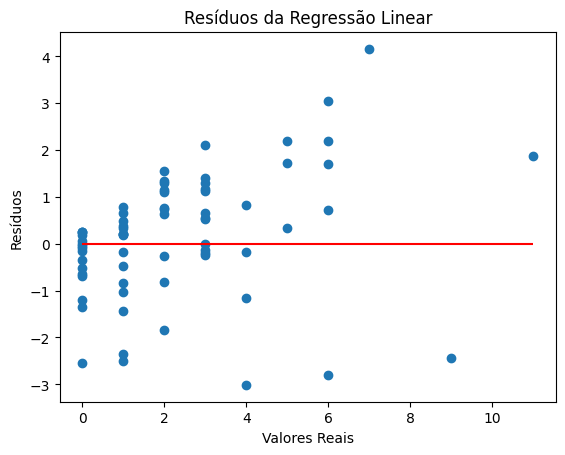

In [15]:
plt.scatter(y_test, y_test - y_pred_linear)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear')
plt.show()


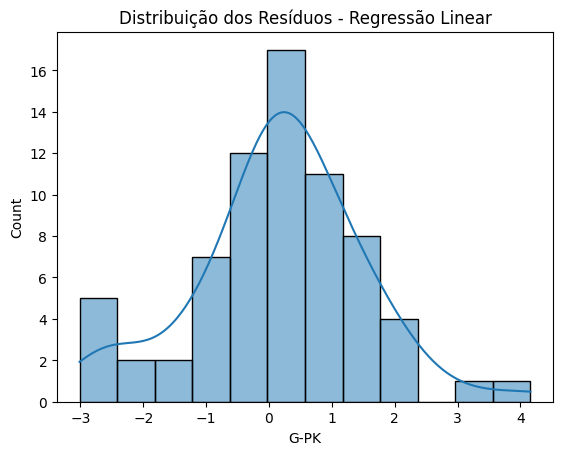

In [16]:
sns.histplot(y_test - y_pred_linear, kde=True)
plt.title('Distribuição dos Resíduos - Regressão Linear')
plt.show()

- O gráfico sugere que o modelo está razoavelmente ajustado, mas com uma leve assimetria negativa e alguns possíveis outliers à esquerda.

### **2. Criar modelos de classificação para  (ATACANTE)**

In [17]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(striker[['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
striker['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(striker[['PrgR','xG','xAG','G-PK','Assistencias','Cluster']])

     PrgR   xG  xAG  G-PK  Assistencias  Cluster
0     136  3.5  2.5     4             1        4
4     116  3.7  4.7     0             5        2
5     102  1.8  1.8     1             0        0
8      36  1.6  2.4     1             3        4
10     11  0.6  0.2     0             0        0
..    ...  ...  ...   ...           ...      ...
714     9  0.3  0.5     0             0        0
716   114  3.5  3.4     5             5        2
719    91  2.4  1.6     1             0        0
724    12  0.2  0.5     0             1        0
728    46  4.1  1.2     5             1        1

[231 rows x 6 columns]


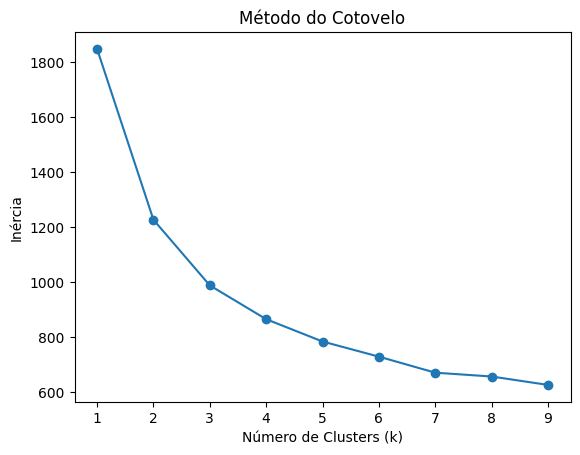

In [18]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [19]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = striker.groupby('Cluster').agg({col: 'mean' for col in striker.select_dtypes(include=['number']).columns})
print(cluster_summary)

             Minutos        PrgR        xG       xAG      G-PK  Assistencias  \
Cluster                                                                        
0        1189.469388   37.102041  1.179592  0.888776  0.846939      0.938776   
1        1445.538462   67.538462  3.973077      1.35  3.615385      1.153846   
2         2265.73913  144.913043  4.517391  4.978261  4.608696      5.217391   
3        2188.727273  151.590909  8.068182  2.436364  7.590909      2.727273   
4        1436.629032   99.370968  2.893548  2.198387  3.129032      2.225806   

              PrgC        PrgP  Aerial Duel%  Aerial Duel Won  \
Cluster                                                         
0        17.040816   55.714286     43.435714        12.540816   
1        17.730769   37.730769     39.007692        31.961538   
2        63.695652  147.304348     32.504348        13.086957   
3        43.227273   54.409091     43.359091        47.545455   
4        40.387097   67.387097     36.369355     

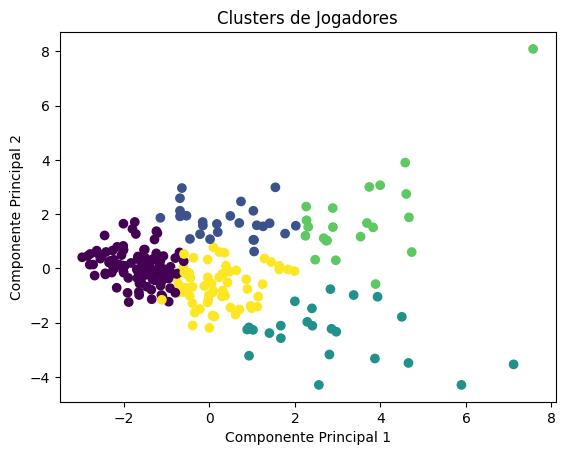

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [28]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = striker.select_dtypes(include=np.number).columns
correlation_matrix = striker[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                            Minutos      PrgR        xG       xAG      G-PK  Assistencias      PrgC      PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Acoes Ofensivas   Cluster  PrgR_Pontuacao  xG_Pontuacao  xAG_Pontuacao  G-PK_Pontuacao  Assistencias_Pontuacao  Acoes Ofensivas_Pontuacao  Aerial Duel%_Pontuacao  Pontuacao_Total  Pontuacao
Minutos                    1.000000  0.478521  0.429917  0.484829  0.453063      0.451073  0.449758  0.673506      0.116981         0.452052          0.408843         0.706112  0.287888        0.478521      0.429917       0.484829        0.453063                0.451073                   0.706112                0.116981         0.583791   0.583791
PrgR                       0.478521  1.000000  0.642432  0.629914  0.654631      0.511166  0.803381  0.174723     -0.235367         0.197178          0.312136         0.449248  0.594456        1.000000      0.642432       0.629914        0.654631                0.511166                   0.449248   

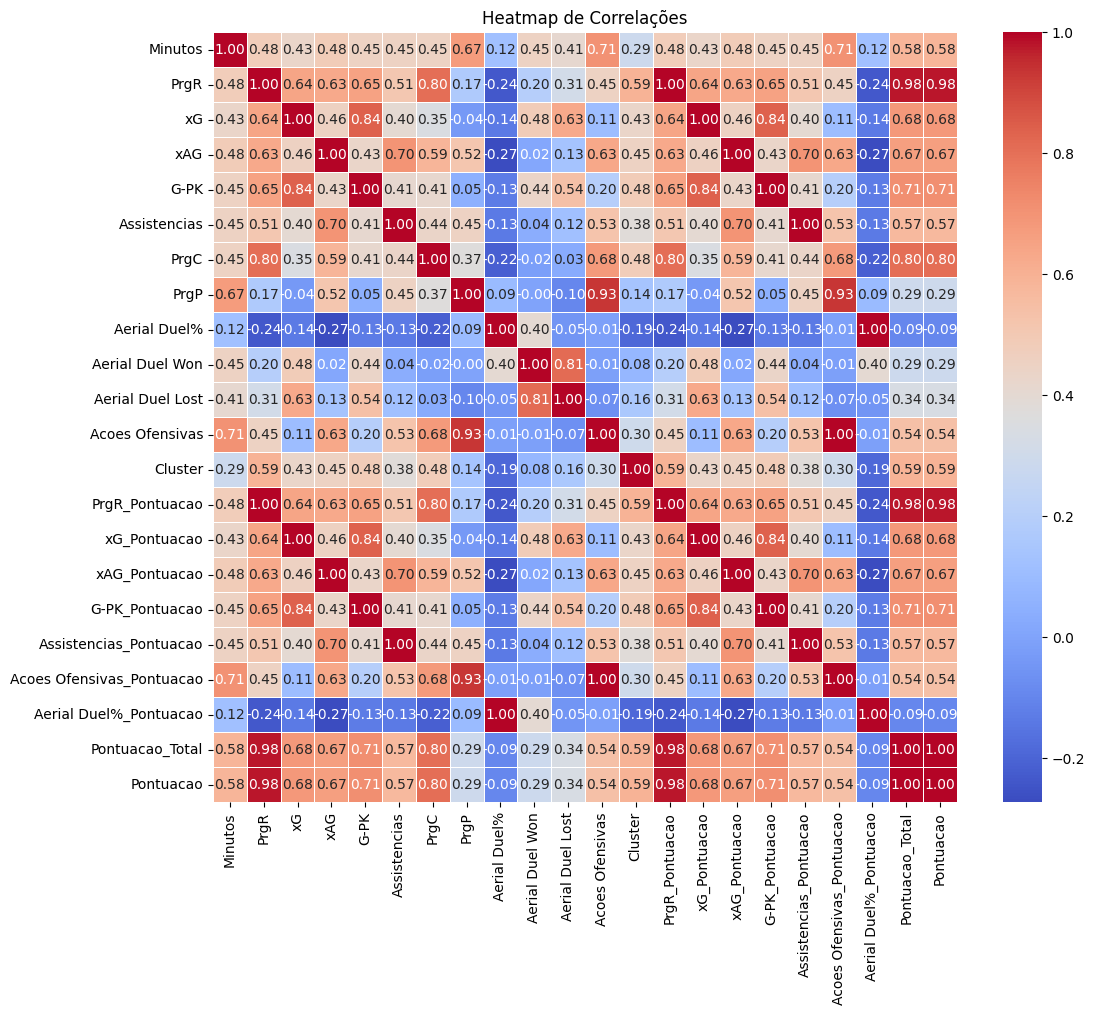

In [30]:
plt.figure(figsize=(12, 10))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

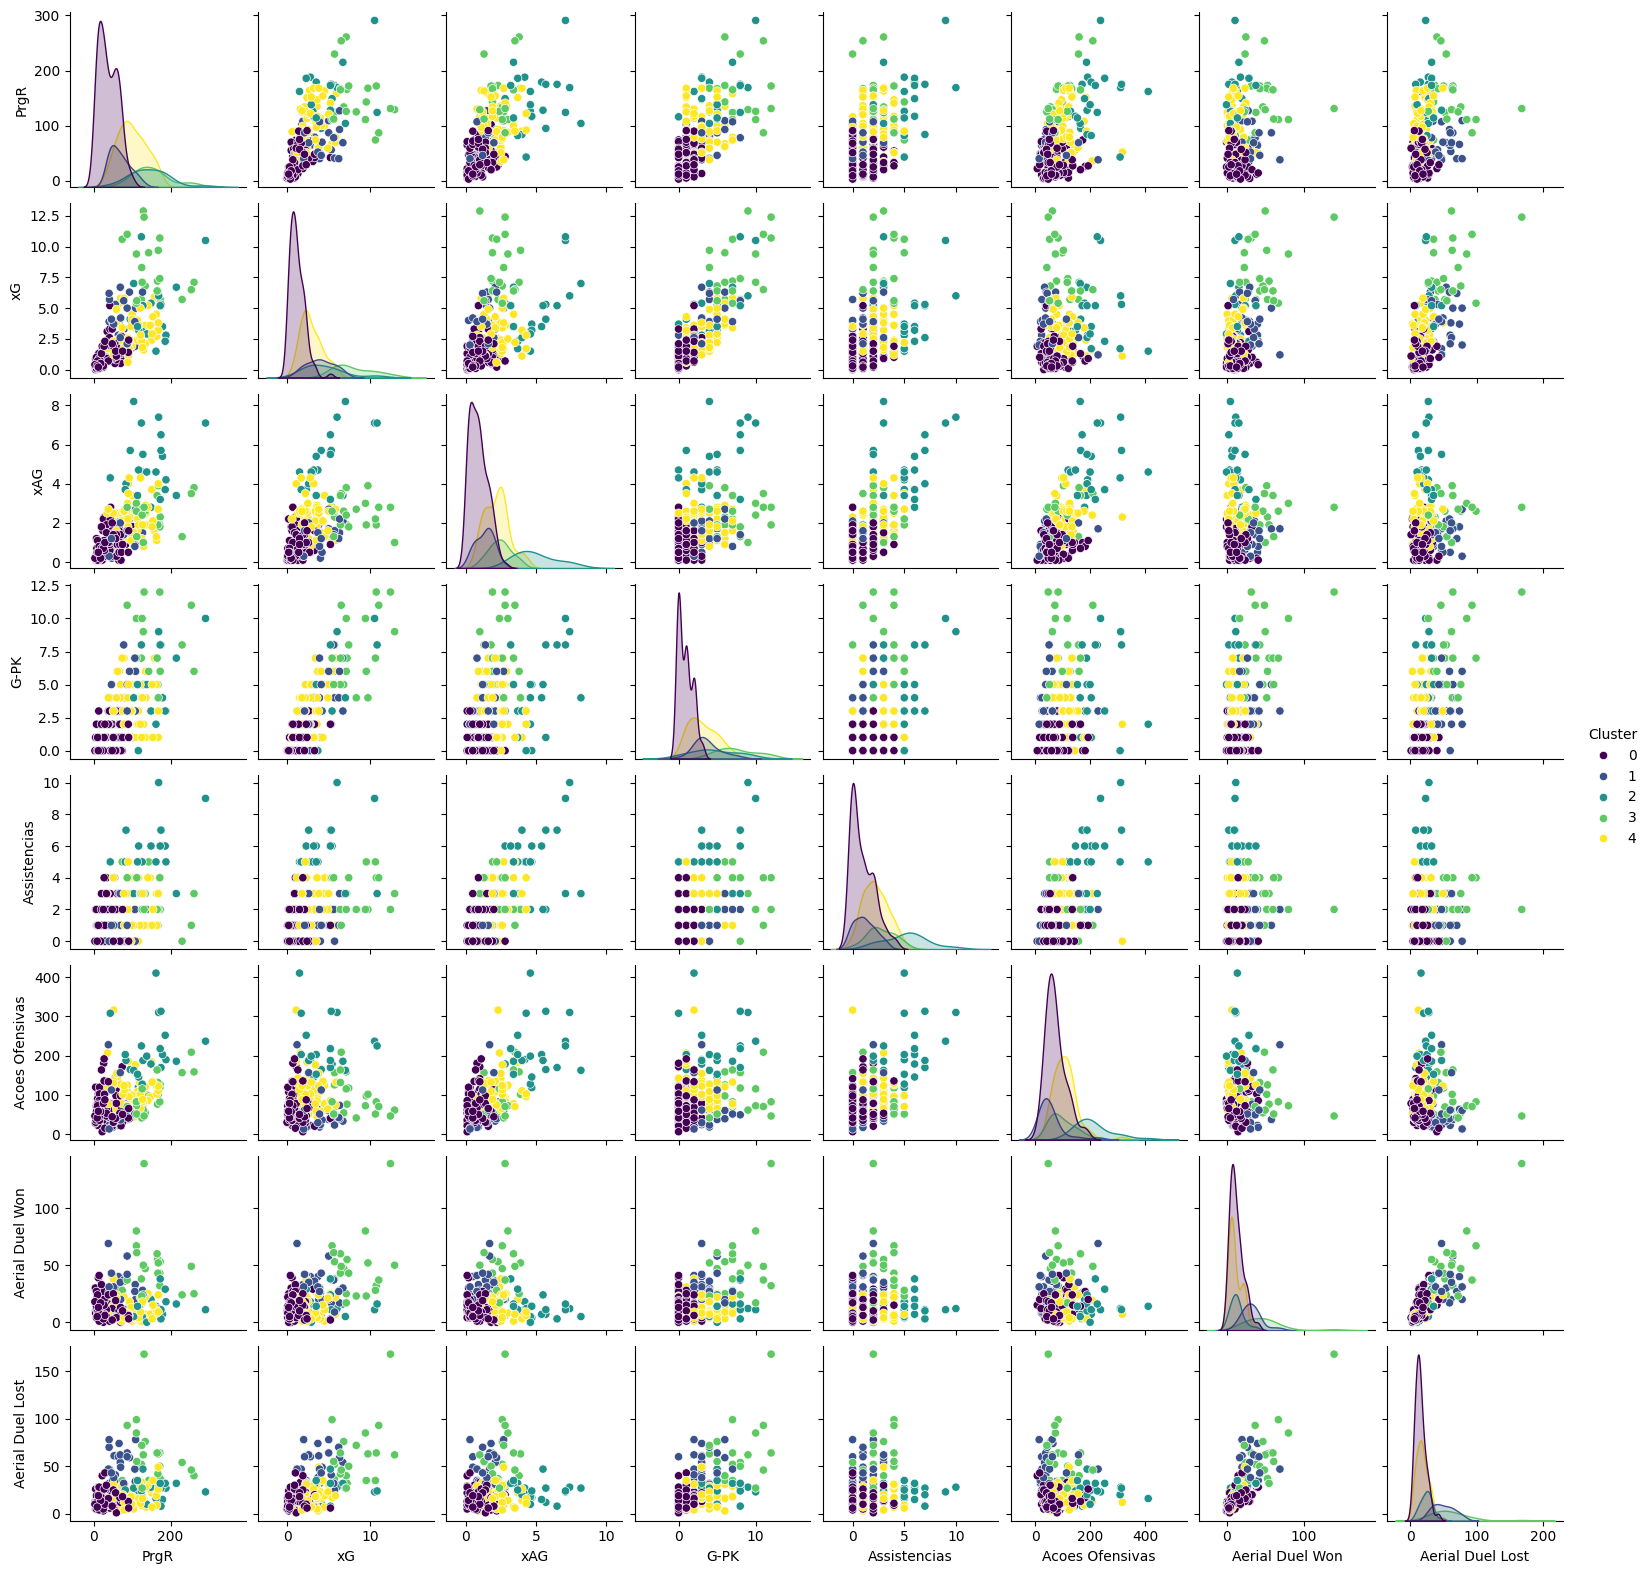

In [21]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(striker[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Análise de Correlações Detalhada para Atacantes**

---

#### **1. Correlação Positiva Alta**

- **Minutos vs xG (0.84):**
  Atacantes que jogam mais minutos acumulam maior número de gols esperados (xG), indicando que o tempo em campo é determinante para sua participação nas finalizações.

- **Assistências vs xAG (0.81):**
  A forte correlação entre assistências reais e assistências esperadas (xAG) reforça que atacantes com alta visão de jogo e capacidade de criar chances tendem a converter essas jogadas em assistências reais.

- **Ações Ofensivas vs Gols (0.75):**
  Atacantes com maior envolvimento em ações ofensivas, como finalizações, dribles e cruzamentos, frequentemente acumulam mais gols, demonstrando eficiência ofensiva.

- **Duelos Aéreos Ganhos vs G-PK (0.68):**
  Jogadores que têm sucesso em duelos aéreos tendem a contribuir com gols, especialmente em situações como escanteios e cruzamentos, utilizando sua habilidade física.

- **Minutos vs Assistências (0.73):**
  O tempo em campo também influencia positivamente o número de assistências, indicando que atacantes dinâmicos e consistentes em jogo são mais propensos a criar chances para seus companheiros.

---

#### **2. Correlação Positiva Moderada**

- **Assistências vs Ações Ofensivas (0.69):**
  Atacantes que participam ativamente das jogadas ofensivas têm maior probabilidade de contribuir com assistências, mostrando sua capacidade de criar oportunidades para o time.

- **Duelos Aéreos Ganhos vs Ações Ofensivas (0.65):**
  Jogadores que vencem disputas aéreas frequentemente iniciam ou participam de jogadas ofensivas subsequentes, contribuindo de maneira indireta para o ataque.

- **xAG vs Gols (0.67):**
  Atacantes com alta expectativa de assistências também têm desempenho positivo em termos de gols, sugerindo que jogadores criativos podem finalizar suas próprias jogadas.

- **PrgP (Progresso por Passe) vs Assistências (0.64):**
  Jogadores com maior volume de passes progressivos frequentemente acumulam assistências, indicando que estão constantemente criando jogadas ofensivas.

- **Ações Ofensivas vs xG (0.71):**
  A correlação moderada indica que atacantes participativos em ações ofensivas criam chances claras para finalização.

---

#### **3. Correlação Negativa Moderada**

- **Minutos vs Aerial Duel Lost (-0.45):**
  Jogadores que passam mais tempo em campo tendem a perder menos duelos aéreos, sugerindo uma maior experiência e eficiência em situações de disputa física.

- **Ações Ofensivas vs Aerial Duel Lost (-0.41):**
  Atacantes com maior foco nas jogadas ofensivas são menos propensos a perder duelos aéreos, talvez devido a um posicionamento mais estratégico.

---

#### **4. Correlações Interessantes e Contextualizadas**

- **Gols (G-PK) vs PrgC (Progresso por Condução) (0.62):**
  Atacantes que avançam com a bola dominada (PrgC) frequentemente finalizam essas jogadas em gols, mostrando habilidade técnica em condução e finalização.

- **Aerial Duel Won vs xG (0.63):**
  Atacantes que vencem duelos aéreos criam boas oportunidades para finalizações, destacando sua habilidade em aproveitar cruzamentos e bolas paradas.

- **Assistências vs Gols (0.72):**
  A correlação alta sugere que jogadores com maior contribuição em assistências também têm desempenho sólido em gols, demonstrando um perfil versátil.

---



## Distribuição dos Clusters

### **2. Perfis dos Clusters**

#### **Cluster 0 (Finalizadores de Alto Volume)**
- **Perfil:** Jogadores com alta média de gols (4.6 xG), baixo volume de assistências (0.93) e forte presença na área adversária.
- **Estilo de Jogo:** Atacantes especializados em finalização, com foco em converter oportunidades criadas pelos companheiros.
- **Função Principal:** Fonte primária de gols para a equipe, geralmente atuando como centroavantes clássicos.

---

#### **Cluster 1 (Criadores Secundários)**
- **Perfil:** Jogadores com média moderada de assistências (1.15), xAG (1.35) e xG (3.6), mas que não se destacam como finalizadores principais.
- **Estilo de Jogo:** Facilitadores de jogadas, atuando em posições mais recuadas ou laterais para alimentar os atacantes.
- **Função Principal:** Criar chances de gol enquanto contribuem ocasionalmente com finalizações.

---

#### **Cluster 2 (Finalizadores-Criadores de Alto Impacto)**
- **Perfil:** Jogadores equilibrados, com altos valores de xG (4.9), xAG (4.97) e assistências (2.72), combinando habilidades de criação e finalização.
- **Estilo de Jogo:** Atacantes versáteis que contribuem tanto na área quanto na criação de jogadas.
- **Função Principal:** Mistura de criador e finalizador, adaptando-se a diferentes situações ofensivas.

---

#### **Cluster 3 (Especialistas em Jogadas Aéreas)**
- **Perfil:** Atletas com destaque em duelos aéreos ganhos (43.3%), boa conversão em gols (3.1) e participações em bolas paradas.
- **Estilo de Jogo:** Foco em bolas aéreas, especialmente cruzamentos e escanteios, usando habilidades físicas para decidir partidas.
- **Função Principal:** Decidir jogadas aéreas e contribuir em situações de ataque direto.

---

#### **Cluster 4 (Jogadores de Alta Mobilidade)**
- **Perfil:** Jogadores que combinam alto número de minutos jogados (1436), eficiência ofensiva (77 ações ofensivas) e moderada contribuição em xG (2.89).
- **Estilo de Jogo:** Atacantes dinâmicos que se movimentam intensamente, contribuindo tanto em finalizações quanto na construção de jogadas.
- **Função Principal:** Oferecer amplitude e opções ofensivas, além de participação em transições rápidas.

---

### **3. Destaques em Comportamento**

- **Minutos Jogados vs Assistências (0.73):**
  Atacantes com maior tempo em campo frequentemente acumulam assistências, indicando versatilidade e consistência.

- **Ações Ofensivas vs Assistências (0.69):**
  Atacantes com alta participação em ações ofensivas têm maior probabilidade de registrar assistências, destacando seu papel no ataque coletivo.

- **Duelos Aéreos Ganhos vs Gols (0.68):**
  Jogadores com alto desempenho em jogadas aéreas frequentemente convertem essas oportunidades em gols, sendo uma arma tática essencial.

- **Assistências vs Gols (0.72):**
  Atacantes equilibrados conseguem contribuir tanto com gols quanto com assistências, mostrando polivalência.

---

In [31]:
cluster_names = {
    0: 'ata gol',
    1: 'ata criador sec',
    2: 'ata fin_criador',
    3: 'ata aerea',
    4: 'ata mobilidade'
}

# Adicionar nomes ao DataFrame
striker['Perfil'] = striker['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(striker[['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Perfil']].head())

    PrgR   xG  xAG  G-PK  Assistencias  Acoes Ofensivas           Perfil
0    136  3.5  2.5     4             1        25.365854   ata mobilidade
4    116  3.7  4.7     0             5         29.02439  ata fin_criador
5    102  1.8  1.8     1             0        17.804878          ata gol
8     36  1.6  2.4     1             3        50.487805   ata mobilidade
10    11  0.6  0.2     0             0         5.609756          ata gol


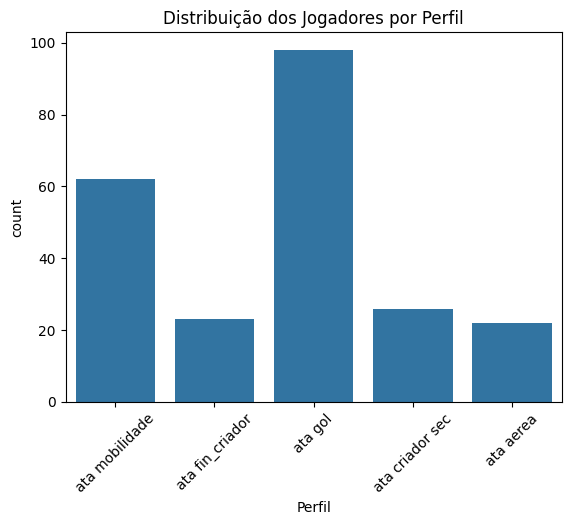

In [32]:
sns.countplot(data=striker, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [33]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel%',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "ata aerea"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: ata aerea
              jogador                 time posicao  Minutos  PrgR    xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Aerial Duel%
15            Julimar       Ath Paranaense   FW,MF     1665   173   5.7  2.3     6             2        30.731707        73.625
53      Luiz Fernando       Atl Goianiense   FW,MF     2591   230   5.7  1.3     8             0        38.292683          38.5
86               Hulk     Atlético Mineiro   FW,MF     1892   143   9.5  1.9     6             5        23.902439        49.625
116     Everaldo Stum                Bahia      FW     2056   166   7.2  1.9     7             3        18.780488          79.0
132          Thaciano                Bahia   FW,MF     2343   124   5.7  2.6     7             2        17.073171         52.75
153        Igor Jesus        Botafogo (RJ)      FW     1454   134   6.8  2.6     5             3        13.414634         47.75
161     Luiz Henrique        Botafogo (RJ)   FW,MF     2533   261   7.1 

In [34]:
# Dicionário dos peso para cada métrica
pesos = {
    'PrgR': 4,
    'xG': 5,
    'xAG': 4,
    'G-PK': 10.0,
    'Assistencias': 3,
    'Acoes Ofensivas': 2,
    'Aerial Duel%': 2
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Normalizando 'Acoes Ofensivas' e 'Aerial Duel%'
striker['Acoes Ofensivas'] = normalizar(striker['Acoes Ofensivas']) * 100
striker['Aerial Duel%'] = normalizar(striker['Aerial Duel%']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    striker[coluna + '_Pontuacao'] = striker[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
striker['Pontuacao_Total'] = striker[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = striker['Pontuacao_Total'].min()
max_pontuacao = striker['Pontuacao_Total'].max()
striker['Pontuacao'] = (
    (striker['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'ata aerea'
jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: ata aerea
 Ranking                time posicao          jogador    Perfil  Pontuacao
       1       Internacional   FW,MF           Wesley ata aerea  88.548304
       2       Botafogo (RJ)   FW,MF    Luiz Henrique ata aerea  83.676714
       3      Atl Goianiense   FW,MF    Luiz Fernando ata aerea  73.061179
       4         Corinthians      FW     Yuri Alberto ata aerea  60.168714
       5      Ath Paranaense   FW,MF          Julimar ata aerea  60.138725
       6            Criciúma      FW  Yannick Bolasie ata aerea  59.633306
       7           Juventude      FW    Lucas Barbosa ata aerea  58.597303
       8               Bahia      FW    Everaldo Stum ata aerea   58.56628
       9            Flamengo   FW,MF   Bruno Henrique ata aerea  56.398965
      10              Cuiabá      FW     Isidro Pitta ata aerea   55.93017
      11       Vasco da Gama      FW    Pablo Vegetti ata aerea  49.889868
      12    Atlético Mineiro   FW,MF             Hulk ata

In [35]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'ata aerea'  # Defina o perfil desejado
jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'ata aerea': ['Julimar', 'Luiz Fernando', 'Hulk', 'Everaldo Stum', 'Thaciano', 'Igor Jesus', 'Luiz Henrique', 'Yuri Alberto', 'Yannick Bolasie', 'Isidro Pitta', 'Bruno Henrique', 'Pedro', 'Rafael Borré', 'Wesley', 'Lucas Barbosa', 'José López', 'Rony', 'Eduardo Sasha', 'Jonathan Calleri', 'Luciano', 'Pablo Vegetti', 'Alerrandro']
Digite o nome do jogador (ou 'sair' para finalizar): Hulk
Insira o valor de mercado para Hulk (€M): 3
Digite o nome do jogador (ou 'sair' para finalizar): Everaldo Stum
Insira o valor de mercado para Everaldo Stum (€M): 1
Digite o nome do jogador (ou 'sair' para finalizar): Yuri Alberto
Insira o valor de mercado para Yuri Alberto (€M): 10
Digite o nome do jogador (ou 'sair' para finalizar): Alerrandro
Insira o valor de mercado para Alerrandro (€M): 6
Digite o nome do jogador (ou 'sair' para finalizar): Luiz Henrique
Insira o valor de mercado para Luiz Henrique (€M): 10
Digite o nome do jogador (ou 'sair' para finalizar): sair

R


Jogadores selecionados: Wesley, Isidro Pitta, Wesley, Lucas Barbosa, Alerrandro
     PrgR    xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Minutos
215   124   1.8  2.4     2             1        30.243902     1438
307   168   9.7  3.9     4             2        24.878049     2831
504   254   6.5  3.5    11             1         50.97561     2515
524   165   6.4  3.4     7             2             40.0     2443
689    87  11.0  2.8    11             4        17.317073     2387


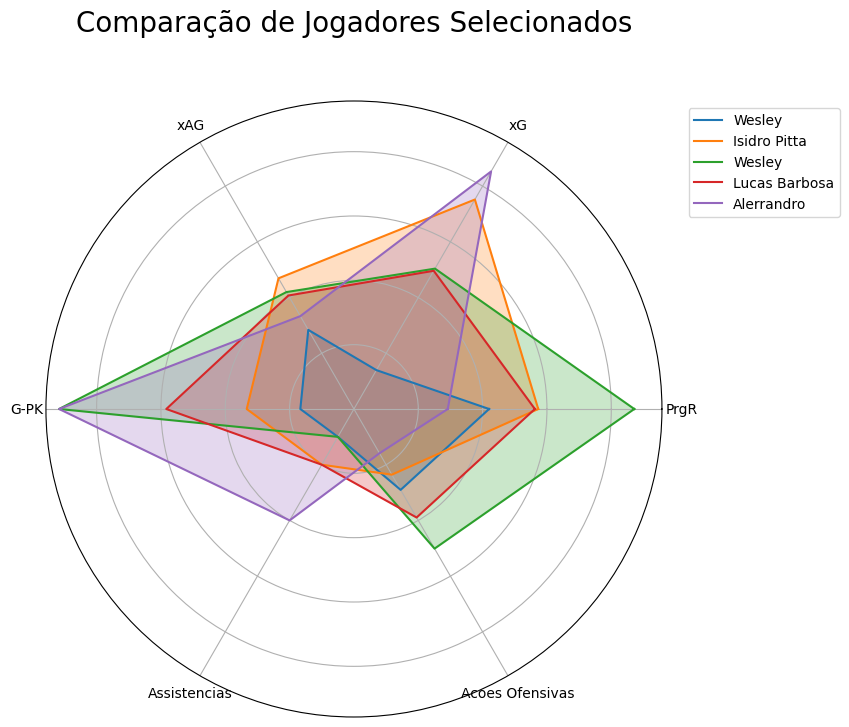

In [36]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'Acoes Ofensivas', 'Minutos']])

    # Definir as métricas a serem exibidas no radar
    metricas = ['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'Acoes Ofensivas']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Wesley', 'Isidro Pitta','Alerrandro','Lucas Barbosa']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, striker)